## the whole code is based on pre-trained models.

In [1]:
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.28.0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [2]:
prompt = input()
image = pipe(prompt).images[0]
# image.save("coffee_cup_on_table.png")

  0%|          | 0/50 [00:00<?, ?it/s]

c:\mini_conda_files\envs\genai\Lib\site-packages\diffusers\models\attention_processor.py:1406: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


In [3]:
name = f"{prompt}.png"

In [4]:
image.save(name)

# using yolo v5

In [5]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\siddh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-29 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


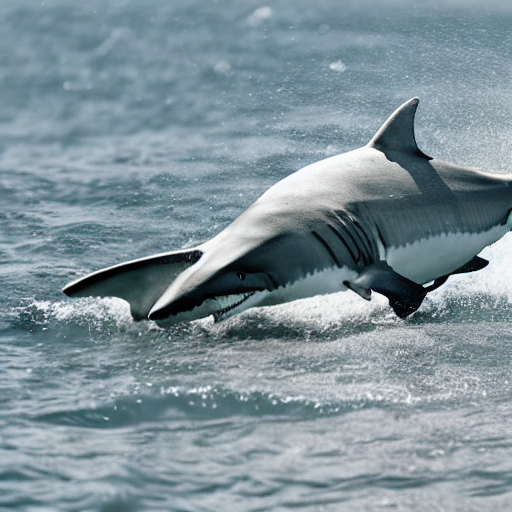

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []


In [6]:
# img = 'coffee_cup_on_table.png'
results = model(image)
results.show()
detected_objects = results.pandas().xyxy[0]
product_list = ["Shoe", "Sneaker", "Bottle", "Cup", "Sandal", "Perfume", "Toy", "Sunglasses", "Car", "Water Bottle", "Chair", "Office Chair", "Can", "Cap", "Hat", "Couch", 
                "Wristwatch", "Glass", "Bag", "Handbag", "Baggage", "Suitcase", "Headphones", "Jar", "Vase"]
filtered_results = detected_objects[detected_objects['name'].isin(product_list)]

print(filtered_results)


In [7]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 512x512 (no detections)
Speed: 4.4ms pre-process, 98.3ms inference, 13.0ms NMS per image at shape (1, 3, 640, 640)

In [8]:
detected_objects

,xmin,ymin,xmax,ymax,confidence,class,name


# using yolo v9

In [9]:
!git clone https://github.com/SkalskiP/yolov9.git
# !pip install -r yolo9/requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.


In [10]:
import os
HOME = os.getcwd()
# print(HOME)

In [11]:
# !pip install -q roboflow

In [12]:
import subprocess

In [16]:
with subprocess.Popen(['python','yolov9//detect.py','--weights',f'{HOME}/weights/yolov9-e.pt','--conf','0.1','--source',f"{prompt}.png",'--name','exp','--device','0']) as process:
    process.communicate()

In [14]:
# !python yolov9//detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source  --name exp --device 0

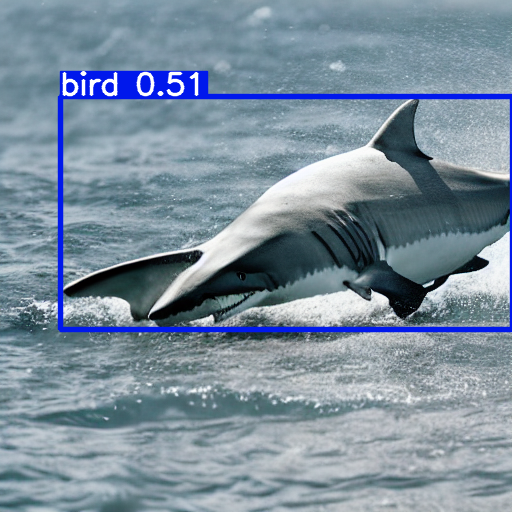

In [18]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp5/{name}", width=600)